# 머신러닝 회귀모델 실습

In [160]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

## 데이터 로딩 및 단위 변경

In [161]:
# read weight-height dataset
data = "data_ml/weight-height.csv"
wh_df = pd.read_csv(data)

In [162]:
wh_df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


## [문제해결] 컬럼 단위를 우리에게 익숙한 값으로 변경하기
- 키 : inch -> cm , 1inch = 2.54cm
- 몸무게 : lb(파운트) -> kg, 1lb = 0.4563kg

In [163]:
# read weight-height data
data = "data_ml/weight-height.csv"
wh_df = pd.read_csv(data)

# 키 변경하기
wh_df['Height'] = wh_df['Height'] * 2.54

# 몸무게 변경하기
wh_df['Weight'] = wh_df['Weight'] * 0.453592

wh_df.head()

,Gender,Height,Weight
0,Male,187.571423,109.720985
1,Male,174.706036,73.622732
2,Male,188.239668,96.497550
3,Male,182.196685,99.809504
4,Male,177.499761,93.598619


In [164]:
# 행, 열 크기 확인
wh_df.shape

(10000, 3)

## 데이터 탐색

In [165]:
# 데이터프레임의 전체 요약 정보를 한눈에 확인
wh_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Gender  10000 non-null  object 
 1   Height  10000 non-null  float64
 2   Weight  10000 non-null  float64
dtypes: float64(2), object(1)
memory usage: 234.5+ KB


In [166]:
# 기초 통계량 확인
wh_df.describe()

,Height,Weight
count,10000.000000,10000.000000
mean,168.573602,73.228054
std,9.772721,14.564131
min,137.828359,29.347460
25%,161.304276,61.605982
50%,168.447898,73.124894
75%,175.702625,84.898599
max,200.656806,122.465167


In [167]:
wh_df['Gender'].describe()

count     10000
unique        2
top        Male
freq       5000
Name: Gender, dtype: object

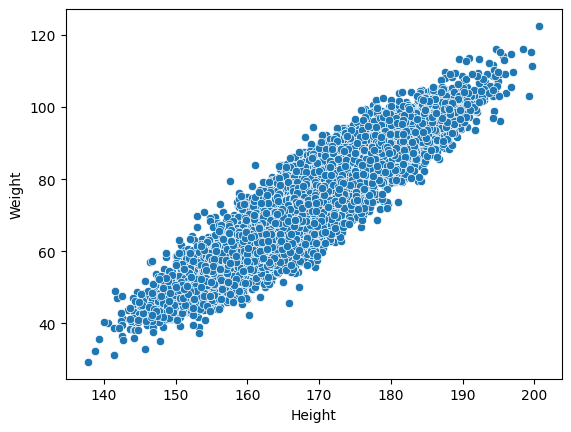

In [ ]:
# 키와 몸무게 분포 시각화
# 트레인 = 학습, 테스트 = 검증
sns.scatterplot(data=wh_df, x='Height', y='Weight')
plt.show()

# 1. 키에 따른 몸무게 예측
## 학습, 테스트 데이터 준비
- Feature(x)와 label(y) 데이터 분리

In [169]:
x = wh_df["Height"] # 입력데이터
y = wh_df["Weight"] # 정답데이터

In [170]:
y[:5]

0    109.720985
1     73.622732
2     96.497550
3     99.809504
4     93.598619
Name: Weight, dtype: float64

## 80%는 트레이닝 데이터, 20%는 테스트 데이터로 나누기
- random_seed 값 주기
- stratify=y 설정은
-- target이 classification인 경우
-- feature가 2개이상 있을 때 사용

In [ ]:
# 학습, 테스트 데이터셋으로 분할

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=10)

In [172]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((8000,), (2000,), (8000,), (2000,))

## 회귀 모델 학습하기
- 선형회귀 : Linear Regression

In [173]:
model_lr = LinearRegression()

In [174]:
x_train_2d = x_train.values.reshape(-1, 1)
x_train_2d


array([[158.38424815],
       [150.90929264],
       [163.96639183],
       ...,
       [172.08583788],
       [167.17562084],
       [174.96463993]], shape=(8000, 1))

In [251]:
# 모델 학습
# model_lr.fit(x_train, y_train)  <-- x_train은 2D 여야함.
model_lr.fit(x_train_2d, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [175]:
# x_train 데이터가 1D 이면 오류 발생함
model_lr.fit(x_train_2d, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [176]:
# 회귀선 기울기 확인(W)
model_lr.coef_

array([1.37825477])

In [177]:
# 회귀선의 절편(b)


## 학습모델 테스트

In [178]:
#print(type(x_test))
print("테스트 데이터", x_test.values)
print()
print(x_train_2d)

테스트 데이터 [173.53649028 164.22298414 188.04787828 ... 171.59270539 162.35978704
 158.54282215]

[[158.38424815]
 [150.90929264]
 [163.96639183]
 ...
 [172.08583788]
 [167.17562084]
 [174.96463993]]


In [179]:
# 테스트 데이터에 대한 예측을 수행
# 독립변수 x_test도 2D로 변환 필요
x_test_2d = x_test.values.reshape(-1,1)
x_test_2d

array([[173.53649028],
       [164.22298414],
       [188.04787828],
       ...,
       [171.59270539],
       [162.35978704],
       [158.54282215]], shape=(2000, 1))

In [180]:
# 테스트 데이터를 모델에 입력해서 테스트 함. -> y_hat(예측값)
y_pred = model_lr.predict(x_test_2d)
y_pred

array([ 80.01053471,  67.17415041, 100.01092448, ...,  77.3315039 ,
        64.60619012,  59.34544004], shape=(2000,))

In [181]:
# 실제값(관측한 테스트의 y값)
y_test

937     93.633249
9355    67.568114
2293    98.799503
192     92.485438
8675    57.775028
          ...    
5624    55.659995
6005    55.155956
987     91.072062
6152    63.903780
2092    73.727611
Name: Weight, Length: 2000, dtype: float64

## 모델 성능 평가하기

[]회귀 모델의 성능 평가 - MSE(Mean Squared Error)
- mse = mean_squared_error(y_test, y_pred)    
- RMSE(Root Mean Squard Error)

In [240]:
y_test[:5]

937     94.192251
9355    67.971504
2293    99.389349
192     93.037587
8675    58.119952
Name: Weight, dtype: float64

In [247]:
# MSE(Mean Squared Error) 계산
mse = mean_squared_error(y_test, y_pred) # (실제값, 예측값)

# RSME(Root Mean Squared Error) 계산
rmse = np.sqrt(mse)

print('MSE :', MSE)
print('RMSE :', RMSE)


MSE : 20.78688216421087
RMSE : 4.5592633356948


## ML 모델 일반화
[문제해결] 내 몸무게 예측해보기
[힌트] x_train 또는 x_test와 같은 shape으로 입력
키 165cm -> 몸무게 ? : [[165]]

- 방법1 :
  lr.predict([[165]])
- 방법2:
  y_pred2 = lr.predict(np.array([177,185]).reshape(-1,1))
  y_pred2
- 방법3:
my_height1 = pd.Series(172)
type(my_height1)
model_lr.predict(my_height1.values.reshape(-1,1))    

### [문제해결] 내 키와 내 가족 한사람 더 추가 해서 예측해보기
- [힌트] x와 같은 shape으로 입력

In [257]:
a = model_lr.coef_
b = model_lr.intercept_
# y_pred = a * x + b
y = a * 165 + b
y

array([68.65250773])

In [260]:
my_data =  np.array([165, 174])
y_pred2 = model_lr.predict(my_data.reshape(-1,1))
y_pred2

array([68.65250773, 81.13085584])

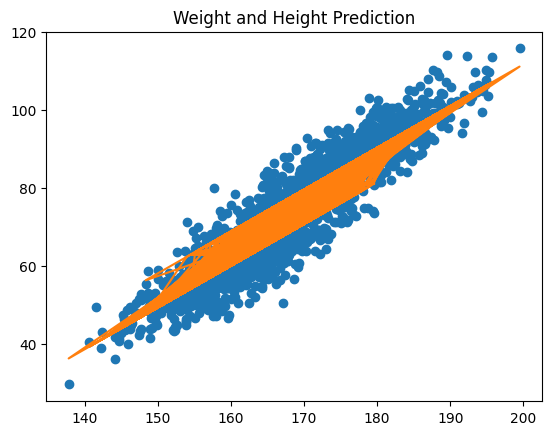

In [255]:
# 예측결과 시각화
plt.plot(x_test, y_test, 'o')
plt.plot(x_test, y_pred)
plt.title('Weight and Height Prediction')
plt.show()

## 키와 성별에 따른 몸무게 예측하기
- feature 갯수 2개로 학습하기
- Gender, height 데이터로 linear regression 모델 만들기
- Gender는 범주형 데이터임 : One Hot Encoding으로 변환하기

In [186]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

### 데이터 로딩 및 가공

In [187]:
# read weight-height dataset
data = "data_ml/weight-height.csv"
gwh_df = pd.read_csv(data)
gwh_df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [188]:
# 인치, 파운드 -> cm, kg으로 변환
gwh_df["Height"] = gwh_df["Height"] * 2.54
gwh_df["Weight"] = gwh_df["Weight"] * 0.4563
# read weight-height dataset
gwh_df.head()

,Gender,Height,Weight
0,Male,187.571423,110.376033
1,Male,174.706036,74.062269
2,Male,188.239668,97.073652
3,Male,182.196685,100.405379
4,Male,177.499761,94.157414


<Figure size 1000x600 with 0 Axes>

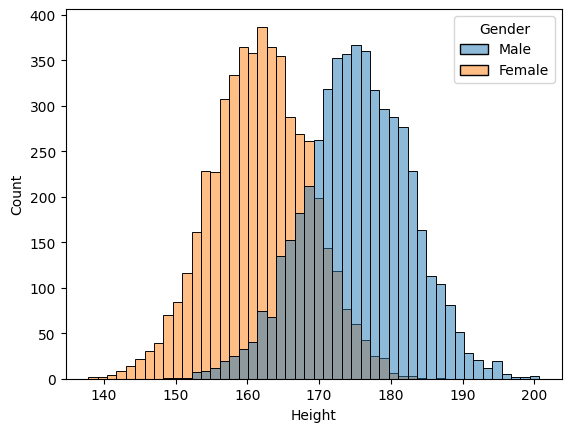

<Figure size 1000x600 with 0 Axes>

In [189]:
# feature distribution
sns.histplot(data=gwh_df, x="Height", hue="Gender")
plt.figure(figsize=(10,6))

## ML을 위한 feature Engineering
- 범주형 데이터 숫자로 변환 : One Hot Encoding

In [190]:
gwh_df['Gender'].value_counts()

Gender
Male      5000
Female    5000
Name: count, dtype: int64

In [191]:
# Gender 컬럼을 숫자로 변환
gwh_df['Gender'] = gwh_df['Gender'].map({"Male": 0, "Female": 1})
gwh_df.head()

,Gender,Height,Weight
0,0,187.571423,110.376033
1,0,174.706036,74.062269
2,0,188.239668,97.073652
3,0,182.196685,100.405379
4,0,177.499761,94.157414


## 학습, 테스트 데이터 준비

In [192]:
# X = Gender, Height
X = gwh_df.drop(columns='Weight')

# y = Weight
y = gwh_df['Weight']

In [193]:
X.head()

,Gender,Height
0,0,187.571423
1,0,174.706036
2,0,188.239668
3,0,182.196685
4,0,177.499761


In [223]:
# train data : test data = 8 : 2
# train  테스트 데이터 분할 
X_train , X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

## 회귀 모델 학습

In [224]:
X_train

,Gender,Height
7496,1,158.384248
7694,1,150.909293
9248,1,163.966392
2470,0,164.883928
4392,0,177.657963
...,...,...
9372,1,162.762175
7291,1,167.778361
1344,0,172.085838
7293,1,167.175621


In [220]:
# 학습모델 객체 생성, 학습 수행
model_lr2 = LinearRegression()
model_lr2.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


## 테스트 및 성능 평가

In [225]:
y_pred = model_lr2.predict(X_test)
y_pred

array([83.34626959, 64.56600829, 98.93675001, ..., 81.25794142,
       62.56426057, 67.23764583], shape=(2000,))

In [226]:
X_test

,Gender,Height
937,0,173.536490
9355,1,164.222984
2293,0,188.047878
192,0,177.111164
8675,1,164.033023
...,...,...
5624,1,157.510125
6005,1,154.093729
987,0,171.592705
6152,1,162.359787


## [문제 해결] MSE , RMSE 구하기

In [227]:
# MSE(Mean Squared Error)를 측정하기
MSE = mean_squared_error(y_test, y_pred)

# RMSE(Root Mean Squared Error)를 측정하기
RMSE = np.sqrt(MSE)

print('MSE :', MSE)
print('RMSE :', RMSE)

# 결과는 도메인마다 다름

MSE : 20.78688216421087
RMSE : 4.5592633356948


## ML 모델 일반화


In [230]:
my_test = np.array([[1, 162]])
my_test

array([[  1, 162]])

In [231]:
model_lr2.predict(my_test)

c:\Users\Admin\miniconda3\envs\eda_env2\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([62.17771913])

## 예측 결과 시각화

In [232]:
X_test[:5]

,Gender,Height
937,0,173.536490
9355,1,164.222984
2293,0,188.047878
192,0,177.111164
8675,1,164.033023


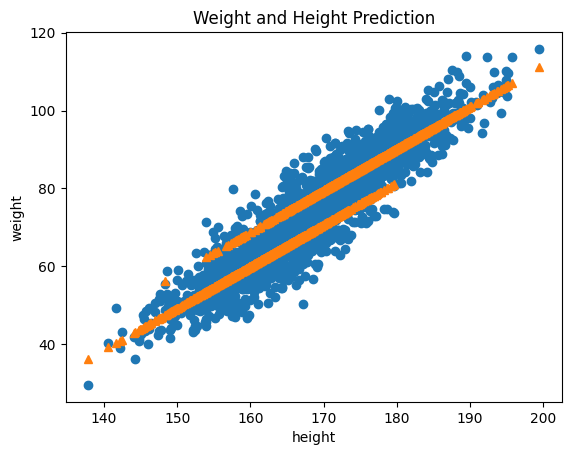

In [233]:
# 테스트 데이터(X)에 따른 실제 몸무게(y)와 예측 데이터(y^) 그래프 그리기
plt.plot(X_test.loc[:,'Height'], y_test, 'o')  # 실제값 표시
plt.plot(X_test.loc[:,'Height'], y_pred, '^')  # 예측값 표시
plt.title('Weight and Height Prediction')
plt.xlabel('height')
plt.ylabel('weight')
plt.show()